In [285]:
from sympy import *
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Latex

init_printing(use_latex=True)

<lambdifygenerated-423>:2: RuntimeWarning: invalid value encountered in log
  return x**2 + log(-1 + x**(-1.0))**2


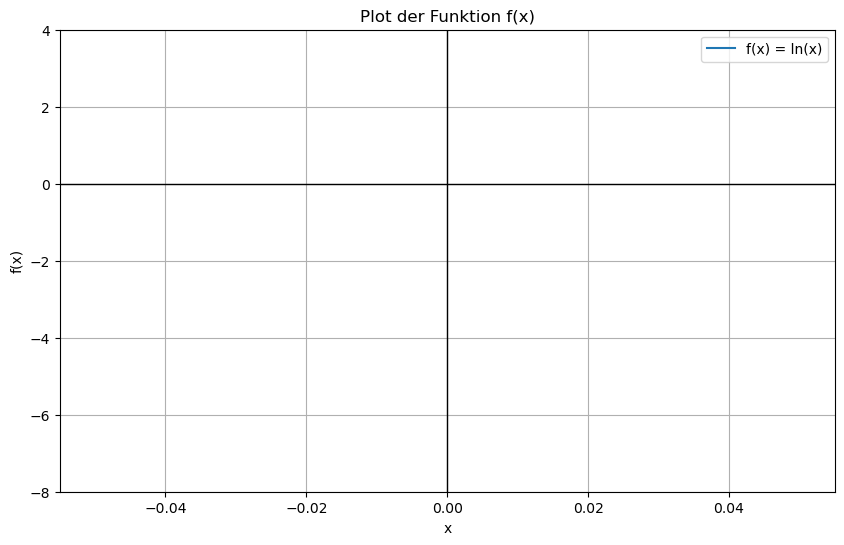

In [286]:
x = symbols('x')
# originalfunktion (vorgegeben)
og_f = root(x**2 + (ln((1/x-1))**2), n=2)

# minimalwertfunktion (zu optimierende funktion. z.B. abstand von 0)
#f = np.e**(x-2)**2
f = x**2 + (ln((1/x-1))**2)

# start from a small positive number to avoid zero division
#x_values = np.linspace(-2, 2, 400)
x_values = np.linspace(1.1, 2, 400)
f_lambdified = sp.lambdify(x, f, "numpy")
y_values = f_lambdified(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = ln(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot der Funktion f(x)')
#plt.xticks(np.arange(-2, 2, 0.5))
#plt.yticks(np.arange(-2, 2, 0.5))
plt.ylim(-8, 4)


plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

plt.grid(True)
plt.legend()
plt.show()

<lambdifygenerated-424>:2: RuntimeWarning: invalid value encountered in log
  return x**2 + log(-1 + x**(-1.0))**2
<lambdifygenerated-425>:2: RuntimeWarning: invalid value encountered in log
  return 2*x - 2*log(-1 + x**(-1.0))/(x**2*(-1 + x**(-1.0)))
<lambdifygenerated-426>:2: RuntimeWarning: invalid value encountered in log
  return 2 + 4*log(-1 + x**(-1.0))/(x**3*(-1 + x**(-1.0))) - 2*log(-1 + x**(-1.0))/(x**4*(-1 + x**(-1.0))**2) + 2/(x**4*(-1 + x**(-1.0))**2)


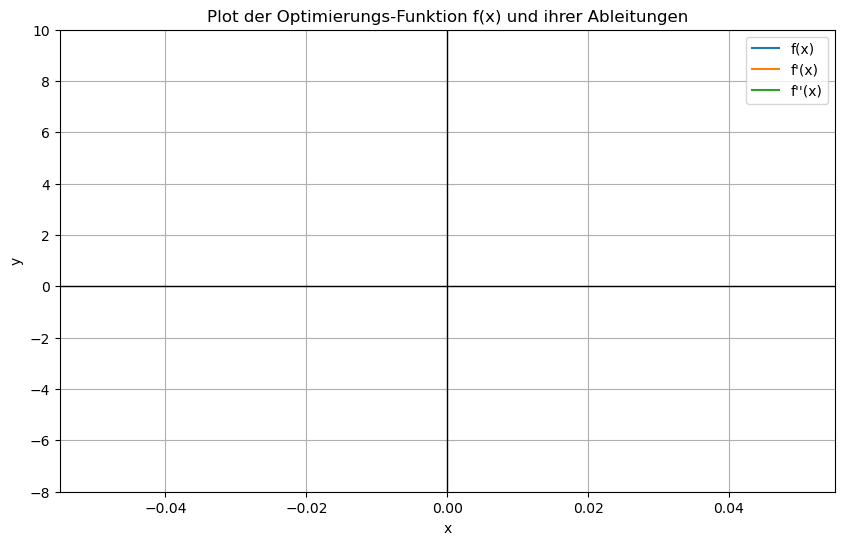

Normal function


First derivative


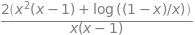

Second derivative


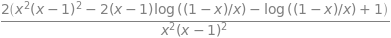

In [287]:
#nf = np.e**(x-2)**2
# optimierungsfunktion
nf = f
# erste und zweite ableitung
nf_d1 = nf.diff()
nf_d2 = nf_d1.diff()

# plot the function and its first and second derivative
nf_lambdified = sp.lambdify(x, nf, 'numpy')
nf_d1_lambdified = sp.lambdify(x, nf_d1, 'numpy')
nf_d2_lambdified = sp.lambdify(x, nf_d2, 'numpy')

plt.figure(figsize=(10, 6))
plt.plot(x_values, nf_lambdified(x_values), label='f(x)')
plt.plot(x_values, nf_d1_lambdified(x_values), label="f'(x)")
plt.plot(x_values, nf_d2_lambdified(x_values), label="f''(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot der Optimierungs-Funktion f(x) und ihrer Ableitungen')
#plt.xticks(np.arange(-2, 2, 0.5))
#plt.yticks(np.arange(-2, 2, 0.5))

# Setzen Sie die Grenzen der x- und y-Achsen
#plt.xlim(0, 1.5)
plt.ylim(-8, 10)

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

plt.grid(True)
plt.legend()
plt.show()

print("Normal function")
display(simplify(nf))
print(f"First derivative")
display(simplify(nf_d1))
print(f"Second derivative")
display(simplify(nf_d2))

# Newton's Method

Newton's Method, also known as the Newton-Raphson method, is an iterative approach to find the roots of a real-valued function. The formula for the method is given by:

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$


In [288]:
og_f = sp.lambdify(x, og_f, 'numpy')
# tol = tolerance (ab welchem Wert soll abgebrochen werden)
tol = 1e-9
# startwert
approx_x = 1.9
f = sp.lambdify(x, nf_d1, 'numpy')
df = sp.lambdify(x, nf_d2, 'numpy')
nIter = 0
max_iter = 100

residuum = abs(f(approx_x))
while residuum > tol:
    approx_x = approx_x - (f(approx_x)/df(approx_x))
    residuum = abs(f(approx_x))
    print(f"Iteration {nIter}: x = {np.round(approx_x, 4)}, f(x) = {og_f(approx_x)}, residuum = {residuum}")
    nIter += 1
    if nIter > max_iter:
        print("Max iterations reached.")
        break

print(f"The approximated x is {approx_x} after {nIter} iterations.\nThe value of the function |f(x)| is {(og_f(approx_x))}.")



The approximated x is 1.9 after 0 iterations.
The value of the function |f(x)| is nan.


<lambdifygenerated-428>:2: RuntimeWarning: invalid value encountered in log
  return 2*x - 2*log(-1 + x**(-1.0))/(x**2*(-1 + x**(-1.0)))
<lambdifygenerated-427>:2: RuntimeWarning: invalid value encountered in log
  return sqrt(x**2 + log(-1 + x**(-1.0))**2)
